In [1]:
from IPython.display import display, HTML, clear_output

display(HTML(data="""
<style>
    div#notebook-container    { width: 90%; }
    div#menubar-container     { width: 90%; }
    div#maintoolbar-container { width: 90%; }
</style>
"""))

import pandas as pd
import numpy as np
import os
import glob
import sys
import datetime
import json
from pandas.io.json import json_normalize

from datetime import timedelta
from pathlib import Path
import time
import seaborn as sns
import matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pyreadstat

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings. filterwarnings('ignore')

pd.options.display.html.table_schema = True
pd.set_option('display.max_columns', 500)

#alt.renderers.enable('notebook')

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier

In [3]:
import math
import pandas as pd
import numpy as np
from operator import itemgetter

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics


from sklearn import tree
from sklearn.tree import _tree

from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier 

from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import GradientBoostingClassifier 

In [4]:
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from itertools import cycle
import matplotlib.pyplot as plt

In [6]:
TARGET_CRIME = "crime_category_encoded"

In [7]:
# 'unnamed: 0', 
# 'id',
# 'block', 
# 'case_number', 
# 'name', 
# 'location.human_address'
# 'location.latitude',
# 'location.longitude',
# 'month_num',

# over predictive
# 'primary_type', 
# 'fbi_code', 
# 'iucr', 
# 'description'

In [8]:
# Load data
df = pd.read_csv(r'C:\Users\croth\Documents\Northwestern University\MSDS 498\Exploratory Data Analysis\input\Dataframes Modified\df_2023_environmental_complaint.csv')

df.columns = df.columns.str.lower()

#df['date'] = pd.to_datetime(df['date'])

# Most predictive variables: primary_type, fbi_code, iucr, description

df = df.drop(['unnamed: 0', 'id', 'block', 'case_number', 'name', 'location.human_address', 'location.latitude', 'location.longitude', 'month_num', 'primary_type', 'fbi_code', 'iucr', 'description', 'arrest', 'domestic', 'updated_on', 'population', 'area(sq mi.)', 'tot_num_environ_complaints'], axis=1)

df

date         location_description  beat  district  ward  \
0       2023-01-01                    APARTMENT   414         4   8.0   
1       2023-01-01                    RESIDENCE   733         7  17.0   
2       2023-01-01                    RESIDENCE  2233        22  21.0   
3       2023-01-01                    APARTMENT  2023        20  48.0   
4       2023-01-01                    APARTMENT  1214        12  27.0   
...            ...                          ...   ...       ...   ...   
259298  2023-12-31                    APARTMENT   214         2   3.0   
259299  2023-12-31                    RESIDENCE  1113        11  28.0   
259300  2023-12-31  RESIDENCE - PORCH / HALLWAY  1812        18  43.0   
259301  2023-12-31                    RESIDENCE  1113        11  28.0   
259302  2023-12-31                    APARTMENT   212         2   4.0   

        community_area  year   latitude  longitude  total_offenders_in_ca  \
0                 46.0  2023  41.745739 -87.575883                   68.0   
1                 68.0  2023  41.760645 -87.651575                   99.0   
2                 49.0  2023  41.693364 -87.634381                  106.0   
3                 77.0  2023  41.976852 -87.655000                   24.0   
4                 28.0  2023  41.887136 -87.655685                   12.0   
...                ...   ...        ...        ...                    ...   
259298            38.0  2023  41.821173 -87.615042                   11.0   
259299            25.0  2023  41.879292 -87.741397                   69.0   
259300             7.0  2023  41.920916 -87.642431                    5.0   
259301            25.0  2023  41.885373 -87.744018                   69.0   
259302            36.0  2023  41.824614 -87.607240                    0.0   

        total_complaints_in_ca  prcp  snow  tempmax_f  tempmin_f  tempavg_f  \
0                         62.0   3.8   0.0      44.96      37.04      41.72   
1                         87.0   3.8   0.0      44.96      37.04      41.72   
2                         84.0   3.8   0.0      44.96      37.04      41.72   
3                        183.0   3.8   0.0      44.96      37.04      41.72   
4                        328.0   3.8   0.0      44.96      37.04      41.72   
...                        ...   ...   ...        ...        ...        ...   
259298                    92.0   1.1   0.0      37.94      32.00      34.34   
259299                   156.0   1.1   0.0      37.94      32.00      34.34   
259300                   567.0   1.1   0.0      37.94      32.00      34.34   
259301                   156.0   1.1   0.0      37.94      32.00      34.34   
259302                    15.0   1.1   0.0      37.94      32.00      34.34   

                 closest_station  closest_station_distance     dow  daytype  \
0                2255 E 103rd St                  0.534530  Sunday  Weekend   
1              3120 S Halsted St                  0.419931  Sunday  Weekend   
2           5101 S Wentworth Ave                  0.408652  Sunday  Weekend   
3               850 W Addison St                  0.256114  Sunday  Weekend   
4       1412 S Blue Island Ave\n                  0.112622  Sunday  Weekend   
...                          ...                       ...     ...      ...   
259298       3510 S Michigan Ave                  0.580390  Sunday  Weekend   
259299         4650 N Pulaski Rd                  0.952029  Sunday  Weekend   
259300        1160 N Larrabee St                  0.081456  Sunday  Weekend   
259301         4650 N Pulaski Rd                  1.125653  Sunday  Weekend   
259302  7040 S Cottage Grove Ave                  0.197904  Sunday  Weekend   

           month   community_name  regional_community  crime_category  \
0        January    SOUTH CHICAGO  Far Southeast Side   violent_crime   
1        January        ENGLEWOOD      Southwest Side   violent_crime   
2        January         ROSELAND  Far Southeast Side   violent_crime   
3        January      

In [9]:
output = r"C:\Users\croth\Documents\Northwestern University\MSDS 498\Initial Findings\output"

In [10]:
#df = df[df.date == '2023-01-01']

In [11]:
#df = df[df.month == 'January']

In [12]:
pd.isnull(df).sum()[pd.isnull(df).sum() > 0]

Series([], dtype: int64)

In [13]:
# Categorized Crimes: 0 = Nonviolent Crimes; 1 = Violent Crimes; 2 = Property Crimes
df['crime_category_encoded'] = df['crime_category'].apply(lambda x: 0 if x in ['nonviolent_crime'] else (1 if x in ['violent_crime'] else 2))

df = df.drop(['crime_category'], axis=1)
df

date         location_description  beat  district  ward  \
0       2023-01-01                    APARTMENT   414         4   8.0   
1       2023-01-01                    RESIDENCE   733         7  17.0   
2       2023-01-01                    RESIDENCE  2233        22  21.0   
3       2023-01-01                    APARTMENT  2023        20  48.0   
4       2023-01-01                    APARTMENT  1214        12  27.0   
...            ...                          ...   ...       ...   ...   
259298  2023-12-31                    APARTMENT   214         2   3.0   
259299  2023-12-31                    RESIDENCE  1113        11  28.0   
259300  2023-12-31  RESIDENCE - PORCH / HALLWAY  1812        18  43.0   
259301  2023-12-31                    RESIDENCE  1113        11  28.0   
259302  2023-12-31                    APARTMENT   212         2   4.0   

        community_area  year   latitude  longitude  total_offenders_in_ca  \
0                 46.0  2023  41.745739 -87.575883                   68.0   
1                 68.0  2023  41.760645 -87.651575                   99.0   
2                 49.0  2023  41.693364 -87.634381                  106.0   
3                 77.0  2023  41.976852 -87.655000                   24.0   
4                 28.0  2023  41.887136 -87.655685                   12.0   
...                ...   ...        ...        ...                    ...   
259298            38.0  2023  41.821173 -87.615042                   11.0   
259299            25.0  2023  41.879292 -87.741397                   69.0   
259300             7.0  2023  41.920916 -87.642431                    5.0   
259301            25.0  2023  41.885373 -87.744018                   69.0   
259302            36.0  2023  41.824614 -87.607240                    0.0   

        total_complaints_in_ca  prcp  snow  tempmax_f  tempmin_f  tempavg_f  \
0                         62.0   3.8   0.0      44.96      37.04      41.72   
1                         87.0   3.8   0.0      44.96      37.04      41.72   
2                         84.0   3.8   0.0      44.96      37.04      41.72   
3                        183.0   3.8   0.0      44.96      37.04      41.72   
4                        328.0   3.8   0.0      44.96      37.04      41.72   
...                        ...   ...   ...        ...        ...        ...   
259298                    92.0   1.1   0.0      37.94      32.00      34.34   
259299                   156.0   1.1   0.0      37.94      32.00      34.34   
259300                   567.0   1.1   0.0      37.94      32.00      34.34   
259301                   156.0   1.1   0.0      37.94      32.00      34.34   
259302                    15.0   1.1   0.0      37.94      32.00      34.34   

                 closest_station  closest_station_distance     dow  daytype  \
0                2255 E 103rd St                  0.534530  Sunday  Weekend   
1              3120 S Halsted St                  0.419931  Sunday  Weekend   
2           5101 S Wentworth Ave                  0.408652  Sunday  Weekend   
3               850 W Addison St                  0.256114  Sunday  Weekend   
4       1412 S Blue Island Ave\n                  0.112622  Sunday  Weekend   
...                          ...                       ...     ...      ...   
259298       3510 S Michigan Ave                  0.580390  Sunday  Weekend   
259299         4650 N Pulaski Rd                  0.952029  Sunday  Weekend   
259300        1160 N Larrabee St                  0.081456  Sunday  Weekend   
259301         4650 N Pulaski Rd                  1.125653  Sunday  Weekend   
259302  7040 S Cottage Grove Ave                  0.197904  Sunday  Weekend   

           month   community_name  regional_community  density (/sq mi.)  \
0        January    SOUTH CHICAGO  Far Southeast Side            8173.65   
1        January        ENGLEWOOD      Southwest Side            7937.79   
2        January         ROSELAND  Far Southeast Side            8053.11   
3        J

In [14]:
df.crime_category_encoded.value_counts()

2    123776
1     98870
0     36657
Name: crime_category_encoded, dtype: int64

In [15]:
# Create a variable for the dataframe data types
dt = df.dtypes

In [16]:
# Create separate lists for categorical and numerical variables
objectList = []
numList = []

In [17]:
for i in dt.index:
    if i in ( [ TARGET_CRIME ] ) : continue
    if dt[i] in (["object","bool"]) : objectList.append(i)
    if dt[i] in (["float64","int64","int32"]) : numList.append(i)

In [18]:
objectList

['date',
 'location_description',
 'closest_station',
 'dow',
 'daytype',
 'month',
 'community_name',
 'regional_community']

In [19]:
numList

['beat',
 'district',
 'ward',
 'community_area',
 'year',
 'latitude',
 'longitude',
 'total_offenders_in_ca',
 'total_complaints_in_ca',
 'prcp',
 'snow',
 'tempmax_f',
 'tempmin_f',
 'tempavg_f',
 'closest_station_distance',
 'density (/sq mi.)',
 'clean and green program request',
 'lead inspection request',
 'sewer cave-in inspection request',
 'sewer cleaning inspection request',
 'snow - object/dibs removal request',
 'snow removal - protected bike lane or bridge sidewalk',
 'snow – uncleared sidewalk complaint',
 'tree debris clean-up request',
 'tree emergency',
 'tree planting request',
 'tree removal request',
 'tree trim request (no longer being accepted)',
 'water lead test kit request',
 'water lead test visit request',
 'water quality concern',
 'extreme weather notification',
 'ice and snow removal request',
 'low water pressure complaint']

In [20]:
# Convert Categorical Variables into Numerical Variables
object_list = []
dt = df.dtypes
df_dummy = df.copy()

for i in dt.index :
    if i in ( [ TARGET_CRIME ] ) : continue
    if dt[i] in (["object","bool"]) : object_list.append( i )
    
for i in object_list :
    thePrefix = "z_" + i
    y = pd.get_dummies( df_dummy[i], prefix=thePrefix )   
    df_dummy = pd.concat( [df_dummy, y], axis=1 )
    df_dummy = df_dummy.drop( i, axis=1 )

In [21]:
df_dummy

beat  district  ward  community_area  year   latitude  longitude  \
0        414         4   8.0            46.0  2023  41.745739 -87.575883   
1        733         7  17.0            68.0  2023  41.760645 -87.651575   
2       2233        22  21.0            49.0  2023  41.693364 -87.634381   
3       2023        20  48.0            77.0  2023  41.976852 -87.655000   
4       1214        12  27.0            28.0  2023  41.887136 -87.655685   
...      ...       ...   ...             ...   ...        ...        ...   
259298   214         2   3.0            38.0  2023  41.821173 -87.615042   
259299  1113        11  28.0            25.0  2023  41.879292 -87.741397   
259300  1812        18  43.0             7.0  2023  41.920916 -87.642431   
259301  1113        11  28.0            25.0  2023  41.885373 -87.744018   
259302   212         2   4.0            36.0  2023  41.824614 -87.607240   

        total_offenders_in_ca  total_complaints_in_ca  prcp  snow  tempmax_f  \
0                        68.0                    62.0   3.8   0.0      44.96   
1                        99.0                    87.0   3.8   0.0      44.96   
2                       106.0                    84.0   3.8   0.0      44.96   
3                        24.0                   183.0   3.8   0.0      44.96   
4                        12.0                   328.0   3.8   0.0      44.96   
...                       ...                     ...   ...   ...        ...   
259298                   11.0                    92.0   1.1   0.0      37.94   
259299                   69.0                   156.0   1.1   0.0      37.94   
259300                    5.0                   567.0   1.1   0.0      37.94   
259301                   69.0                   156.0   1.1   0.0      37.94   
259302                    0.0                    15.0   1.1   0.0      37.94   

        tempmin_f  tempavg_f  closest_station_distance  density (/sq mi.)  \
0           37.04      41.72                  0.534530            8173.65   
1           37.04      41.72                  0.419931            7937.79   
2           37.04      41.72                  0.408652            8053.11   
3           37.04      41.72                  0.256114           32354.02   
4           37.04      41.72                  0.112622           11929.88   
...           ...        ...                       ...                ...   
259298      32.00      34.34                  0.580390           14131.61   
259299      32.00      34.34                  0.952029           13504.48   
259300      32.00      34.34                  0.081456           22307.59   
259301      32.00      34.34                  1.125653           13504.48   
259302      32.00      34.34                  0.197904           11722.41   

        clean and green program request  lead inspection request  \
0                                   0.0                      0.0   
1                                   0.0                      0.0   
2                                   0.0                      0.0   
3                                   0.0                      0.0   
4                                   0.0                      0.0   
...                                 ...                      ...   
259298                              0.0                      0.0   
259299                              0.0                      0.0   
259300                              0.0                      0.0   
259301                              0.0                      0.0   
259302                              0.0                      0.0   

        sewer cave-in inspection request  sewer cleaning inspection request  \
0                                    0.0                                0.0   
1                                    0.0                                0.0   
2                                    0.0                                1.0   
3                                    0.0                                0.0 

In [22]:
df_dummy.shape

(259303, 664)

In [23]:
df

date         location_description  beat  district  ward  \
0       2023-01-01                    APARTMENT   414         4   8.0   
1       2023-01-01                    RESIDENCE   733         7  17.0   
2       2023-01-01                    RESIDENCE  2233        22  21.0   
3       2023-01-01                    APARTMENT  2023        20  48.0   
4       2023-01-01                    APARTMENT  1214        12  27.0   
...            ...                          ...   ...       ...   ...   
259298  2023-12-31                    APARTMENT   214         2   3.0   
259299  2023-12-31                    RESIDENCE  1113        11  28.0   
259300  2023-12-31  RESIDENCE - PORCH / HALLWAY  1812        18  43.0   
259301  2023-12-31                    RESIDENCE  1113        11  28.0   
259302  2023-12-31                    APARTMENT   212         2   4.0   

        community_area  year   latitude  longitude  total_offenders_in_ca  \
0                 46.0  2023  41.745739 -87.575883                   68.0   
1                 68.0  2023  41.760645 -87.651575                   99.0   
2                 49.0  2023  41.693364 -87.634381                  106.0   
3                 77.0  2023  41.976852 -87.655000                   24.0   
4                 28.0  2023  41.887136 -87.655685                   12.0   
...                ...   ...        ...        ...                    ...   
259298            38.0  2023  41.821173 -87.615042                   11.0   
259299            25.0  2023  41.879292 -87.741397                   69.0   
259300             7.0  2023  41.920916 -87.642431                    5.0   
259301            25.0  2023  41.885373 -87.744018                   69.0   
259302            36.0  2023  41.824614 -87.607240                    0.0   

        total_complaints_in_ca  prcp  snow  tempmax_f  tempmin_f  tempavg_f  \
0                         62.0   3.8   0.0      44.96      37.04      41.72   
1                         87.0   3.8   0.0      44.96      37.04      41.72   
2                         84.0   3.8   0.0      44.96      37.04      41.72   
3                        183.0   3.8   0.0      44.96      37.04      41.72   
4                        328.0   3.8   0.0      44.96      37.04      41.72   
...                        ...   ...   ...        ...        ...        ...   
259298                    92.0   1.1   0.0      37.94      32.00      34.34   
259299                   156.0   1.1   0.0      37.94      32.00      34.34   
259300                   567.0   1.1   0.0      37.94      32.00      34.34   
259301                   156.0   1.1   0.0      37.94      32.00      34.34   
259302                    15.0   1.1   0.0      37.94      32.00      34.34   

                 closest_station  closest_station_distance     dow  daytype  \
0                2255 E 103rd St                  0.534530  Sunday  Weekend   
1              3120 S Halsted St                  0.419931  Sunday  Weekend   
2           5101 S Wentworth Ave                  0.408652  Sunday  Weekend   
3               850 W Addison St                  0.256114  Sunday  Weekend   
4       1412 S Blue Island Ave\n                  0.112622  Sunday  Weekend   
...                          ...                       ...     ...      ...   
259298       3510 S Michigan Ave                  0.580390  Sunday  Weekend   
259299         4650 N Pulaski Rd                  0.952029  Sunday  Weekend   
259300        1160 N Larrabee St                  0.081456  Sunday  Weekend   
259301         4650 N Pulaski Rd                  1.125653  Sunday  Weekend   
259302  7040 S Cottage Grove Ave                  0.197904  Sunday  Weekend   

           month   community_name  regional_community  density (/sq mi.)  \
0        January    SOUTH CHICAGO  Far Southeast Side            8173.65   
1        January        ENGLEWOOD      Southwest Side            7937.79   
2        January         ROSELAND  Far Southeast Side            8053.11   
3        J

### Scale the Data

In [24]:
### MinMaxScalar
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_dummy)

In [25]:
df_mm = pd.DataFrame(df_scaled)
df_mm.columns = df_dummy.columns
df_mm

beat  district      ward  community_area  year  latitude  \
0       0.125000  0.100000  0.718121        0.592105   0.0  0.998037   
1       0.256601  0.200000  0.778523        0.881579   0.0  0.998143   
2       0.875413  0.700000  0.805369        0.631579   0.0  0.997666   
3       0.788779  0.633333  0.986577        1.000000   0.0  0.999676   
4       0.455033  0.366667  0.845638        0.355263   0.0  0.999040   
...          ...       ...       ...             ...   ...       ...   
259298  0.042492  0.033333  0.684564        0.486842   0.0  0.998572   
259299  0.413366  0.333333  0.852349        0.315789   0.0  0.998984   
259300  0.701733  0.566667  0.953020        0.078947   0.0  0.999279   
259301  0.413366  0.333333  0.852349        0.315789   0.0  0.999027   
259302  0.041667  0.033333  0.691275        0.460526   0.0  0.998596   

        longitude  total_offenders_in_ca  total_complaints_in_ca      prcp  \
0        0.995525               0.535433                0.098214  0.037291   
1        0.988929               0.779528                0.142857  0.037291   
2        0.990427               0.834646                0.137500  0.037291   
3        0.988631               0.188976                0.314286  0.037291   
4        0.988571               0.094488                0.573214  0.037291   
...           ...                    ...                     ...       ...   
259298   0.992113               0.086614                0.151786  0.010795   
259299   0.981102               0.543307                0.266071  0.010795   
259300   0.989726               0.039370                1.000000  0.010795   
259301   0.980873               0.543307                0.266071  0.010795   
259302   0.992793               0.000000                0.014286  0.010795   

        snow  tempmax_f  tempmin_f  tempavg_f  closest_station_distance  \
0        0.0   0.374233   0.480769   0.418502              5.335986e-07   
1        0.0   0.374233   0.480769   0.418502              4.190000e-07   
2        0.0   0.374233   0.480769   0.418502              4.077205e-07   
3        0.0   0.374233   0.480769   0.418502              2.551825e-07   
4        0.0   0.374233   0.480769   0.418502              1.116903e-07   
...      ...        ...        ...        ...                       ...   
259298   0.0   0.294479   0.413462   0.328194              5.794589e-07   
259299   0.0   0.294479   0.413462   0.328194              9.510986e-07   
259300   0.0   0.294479   0.413462   0.328194              8.052401e-08   
259301   0.0   0.294479   0.413462   0.328194              1.124722e-06   
259302   0.0   0.294479   0.413462   0.328194              1.969723e-07   

        density (/sq mi.)  clean and green program request  \
0                0.191188                              0.0   
1                0.184897                              0.0   
2                0.187973                              0.0   
3                0.836155                              0.0   
4                0.291378                              0.0   
...                   ...                              ...   
259298           0.350106                              0.0   
259299           0.333378                              0.0   
259300           0.568185                              0.0   
259301           0.333378                              0.0   
259302           0.285845                              0.0   

        lead inspection request  sewer cave-in inspection request  \
0                           0.0                               0.0   
1                           0.0                               0.0   
2                           0.0                               0.0   
3                           0.0                               0.0   
4                           0.0                               0.0   
...                         ...                               ...   
259298                      0.0                               0.0   
259299      

### t-SNE Analysis

In [26]:
from sklearn.manifold import TSNE

In [27]:
# # Using minmax scaled data
# z = TSNE(n_components=2, perplexity=100, verbose=0, n_iter=1000, learning_rate=100).fit_transform(df_mm) 

In [28]:
# plt.figure(figsize=(10, 10))
# df_tsne = pd.DataFrame()
# df_tsne["y"] = df['crime_category_encoded']
# df_tsne["comp-1"] = z[:,0]
# df_tsne["comp-2"] = z[:,1]

# sns.scatterplot(x="comp-1", y="comp-2", hue=df_tsne.y.tolist(),
#                 palette=sns.color_palette("hls", 3),
#                 data=df_tsne)

### Hierarchical Clustering

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [30]:
# Look at dendrogram with ward linkage truncated to 100 clusters
plt.figure(figsize = (10, 6))
dendrogram_complete = dendrogram(linkage(df_mm, method = 'ward'), p = 100, leaf_rotation = 90)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Size of Cluster')
plt.ylabel('Distance')
plt.show()

MemoryError: Unable to allocate 250. GiB for an array with shape (33618893253,) and data type float64

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Look at dendrogram with single linkage truncated to 100 clusters
plt.figure(figsize = (10, 6))
dendrogram_complete = dendrogram(linkage(df_mm, method = 'single'), truncate_mode = 'lastp', p = 100, leaf_rotation = 90)
plt.title('Dendrogram for Hierarchical Clustering - Single Linkage')
plt.xlabel('Size of Cluster')
plt.ylabel('Distance')
plt.show()

In [ ]:
# Look at dendrogram with average linkage truncated to 100 clusters
plt.figure(figsize = (10, 6))
dendrogram_complete = dendrogram(linkage(df_mm, method = 'average'), truncate_mode = 'lastp', p = 100, leaf_rotation = 90)
plt.title('Dendrogram for Hierarchical Clustering - Average Linkage')
plt.xlabel('Size of Cluster')
plt.ylabel('Distance')
plt.show()

In [ ]:
# Look at dendrogram with complete linkage truncated to 100 clusters
plt.figure(figsize = (10, 6))
dendrogram_complete = dendrogram(linkage(df_mm, method = 'complete'), truncate_mode = 'lastp', p = 100, leaf_rotation = 90)
plt.title('Dendrogram for Hierarchical Clustering - Complete Linkage')
plt.xlabel('Size of Cluster')
plt.ylabel('Distance')
plt.show()

In [ ]:
# print(dendrogram_complete['color_list'])

In [ ]:
# unique_colors = set(dendrogram_complete['color_list'])
# print(unique_colors)

In [ ]:
# optimal_number_of_clusters = len(unique_colors)
# print(optimal_number_of_clusters)

In [ ]:
# clusters = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='complete')
# label = clusters.fit_predict(df_mm)

In [ ]:
# label_values = pd.Series(label,index=df_mm.index)
# df_mm['c_clusters'] = label_values.values

In [ ]:
# df_mm.c_clusters.value_counts()

In [ ]:
# # ridge plots by variable
# x_var = "month_num"

# sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
# palette = sns.color_palette("flare", 12)
# g = sns.FacetGrid(df_mm, palette=palette, row="clusters", hue="clusters", aspect=9, height=1.2)
# g.map_dataframe(sns.kdeplot, x=x_var, fill=True, alpha=1)
# g.map_dataframe(sns.kdeplot, x=x_var, color='black')
# def label(x, color, label):
#     ax = plt.gca()
#     ax.text(0, .2, label, color='black', fontsize=13,
#             ha="left", va="center", transform=ax.transAxes)

# g.map(label, x_var)
# g.fig.subplots_adjust(hspace=-.5)
# g.set_titles("")
# g.set(yticks=[], xlabel="Year Built (scaled)")
# g.despine( left=True)

### k-Means Clustering

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [32]:
import matplotlib.style as style

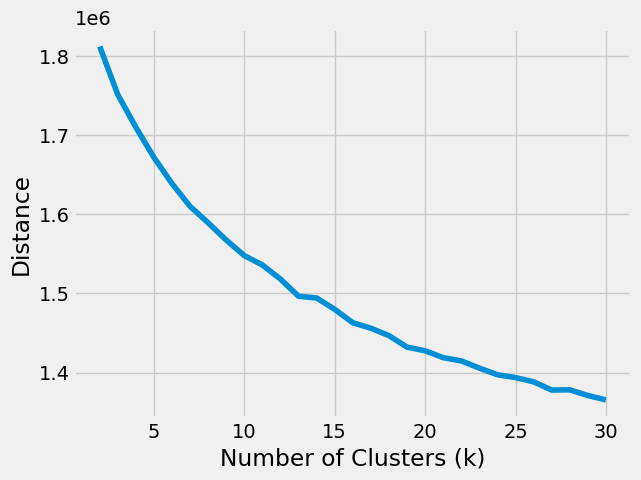

In [33]:
avg_distance=[]
k_list = list(range(2, 31))

for n_clusters in k_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0).fit(df_mm)
    avg_distance.append(clusterer.inertia_)

style.use("fivethirtyeight")
plt.plot(k_list, avg_distance)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distance")
plt.show()

In [34]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib.style as style

In [ ]:
# Perform k-means clustering (minmax scaling) for different numbers of clusters, calculate the inertia and silhouette score for each number of clusters, and
# plot inertia and silhouette score vs number of clusters

inertias_minmax = []
silhouettes_minmax = []
k_list = list(range(2, 31))

for k in k_list:
    kmeans_minmax = KMeans(n_clusters = k, random_state = 0).fit(df_scaled)
    inertias_minmax.append(kmeans_minmax.inertia_)
    silhouettes_minmax.append(silhouette_score(df_mm, kmeans_minmax.labels_, random_state = 0))
    
sns.set_theme()
fig, ax = plt.subplots(figsize = (10,6))
sns.lineplot(x = k_list, y = inertias_minmax, label = 'Inertia', legend = False)
sns.despine()
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
ax2 = ax.twinx()
sns.lineplot(x = k_list, y = silhouettes_minmax, ax = ax2, label = 'Silhouette Score', color = 'r', legend = False)
sns.despine(right = False)
plt.ylabel('Silhouette Score')
ax.figure.legend()
plt.title('Inertia and Silhouette Score vs Number of Clusters for K-Means Clustering')
plt.xticks(k_list)
plt.show()

In [ ]:
# # Use KElbowVisualizer to display elbow curve
# from yellowbrick.cluster import KElbowVisualizer
# kmeans = KMeans(n_clusters = k, random_state = 0)
# visualizer = KElbowVisualizer(kmeans, k = (2, 31), timings= True)
# visualizer.fit(df)
# visualizer.show()

In [ ]:
# # build the clustering model
# kmeans = KMeans(n_clusters=14)
# kmeans.fit(df_mm)

In [ ]:
# label = kmeans.fit_predict(df_mm)
# kmeans.cluster_centers_

In [ ]:
# label_values = pd.Series(label,index=df_mm.index)
# df_mm['clusters'] = label_values.values

In [ ]:
# Perform k-means clustering (minmax scaling) with n clusters, and look at value counts for each cluster
kmeans_minmax = KMeans(n_clusters = 4, random_state = 0).fit(df_mm)
df_kmeans_minmax = pd.concat([df, pd.DataFrame({'cluster': kmeans_minmax.labels_}, index = df.index)], axis = 1)
df_kmeans_minmax['cluster'].value_counts()

In [ ]:
df_kmeans_minmax.to_csv(output + '\df_kmeans_minmax_removed_duplicate_cols_&_over_predictors_Jan2023_4_clusters.csv')

df_kmeans_minmax

In [ ]:
df_kmeans_minmax['new_col'] = range(1, len(df_kmeans_minmax) + 1)
df_kmeans_minmax

In [ ]:
table = pd.pivot_table(df_kmeans_minmax, values='new_col', index=['crime_category_encoded'],
                       columns=['cluster'], aggfunc="count")

table

In [ ]:
table = pd.pivot_table(df_kmeans_minmax, values='new_col', index=['regional_community'],
                       columns=['cluster'], aggfunc="count")

table

In [ ]:
df_kmeans_minmax_filter = df_kmeans_minmax[(df_kmeans_minmax.latitude > -99) & (df_kmeans_minmax.longitude > -99)]

In [ ]:
df_kmeans_minmax_filter.describe()

In [ ]:
palette = 'Set1'

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.scatterplot(x="longitude", y="latitude", hue='cluster', palette=palette, data=df_kmeans_minmax_filter)
plt.title('Latitude & Longitude Across KMeans Clusters')
plt.legend(title='Label')
plt.show()